In [1]:
import os
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
im_file = 'images/subject01_happy.png'
im = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)

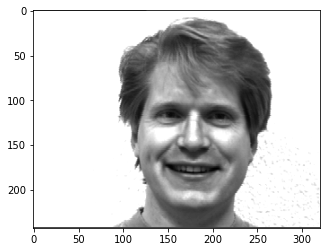

In [3]:
plt.imshow(im, cmap='gray')

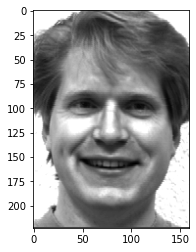

In [4]:
im_crop = im[20:, 100:260] 
plt.imshow(im_crop, cmap='gray')

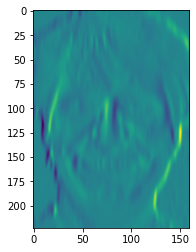

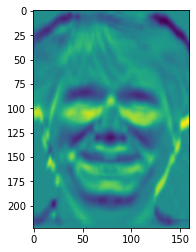

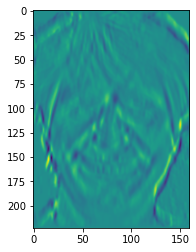

In [5]:

# Blur image
sigma = 5
low_pass = cv2.getGaussianKernel(3*sigma, sigma)
im_blur = cv2.filter2D(src=im_crop, ddepth=-1, kernel=low_pass)

# Use Sobel edge detection for x, y and combined
sobelx = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=0, ksize=sigma) 
sobely = cv2.Sobel(src=im_blur, ddepth=-1, dx=0, dy=1, ksize=sigma) 
sobelxy = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=1, ksize=sigma)

plt.imshow(sobelx)
plt.show()
plt.imshow(sobely)
plt.show()
plt.imshow(sobelxy)
plt.show()
#Sobel in the y direction seems best for detecting facial features

In [6]:
im_file = 'images/subject03_normal.png'
im = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im_crop = im[30:, 90:240]


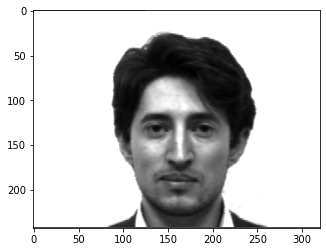

In [7]:
plt.imshow(im, cmap='gray')

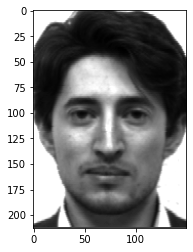

In [8]:
im_crop = im[30:, 90:240]
plt.imshow(im_crop, cmap='gray')

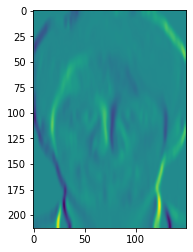

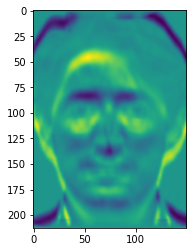

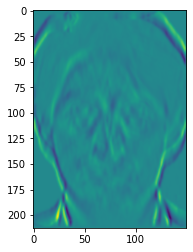

In [9]:

# Blur image
sigma = 5
low_pass = cv2.getGaussianKernel(3*sigma, sigma)
im_blur = cv2.filter2D(src=im_crop, ddepth=-1, kernel=low_pass)

# Use Sobel edge detection for x, y and combined
sobelx = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=0, ksize=sigma) 
sobely = cv2.Sobel(src=im_blur, ddepth=-1, dx=0, dy=1, ksize=sigma) 
sobelxy = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=1, ksize=sigma)

plt.imshow(sobelx)
plt.show()
plt.imshow(sobely)
plt.show()
plt.imshow(sobelxy)
plt.show()
#Sobel in the y direction seems best for detecting facial features

In [10]:
im_file = 'images/subject05_normal.png'
im = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im_crop = im[30:, 110:260]

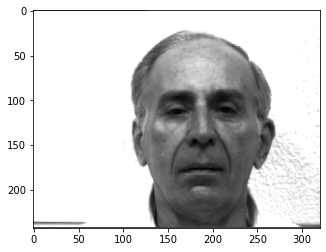

In [11]:
plt.imshow(im, cmap='gray')

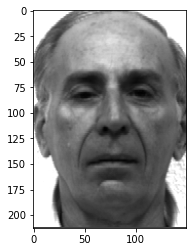

In [12]:
im_crop = im[30:, 110:260]
plt.imshow(im_crop, cmap='gray')

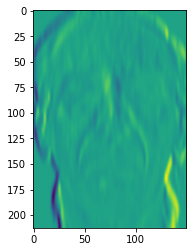

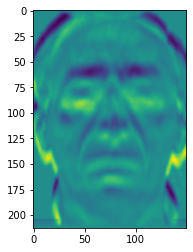

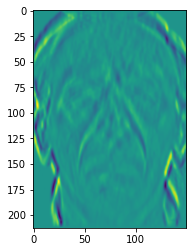

In [13]:

# Blur image
sigma = 5
low_pass = cv2.getGaussianKernel(3*sigma, sigma)
im_blur = cv2.filter2D(src=im_crop, ddepth=-1, kernel=low_pass)

# Use Sobel edge detection for x, y and combined
sobelx = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=0, ksize=sigma) 
sobely = cv2.Sobel(src=im_blur, ddepth=-1, dx=0, dy=1, ksize=sigma) 
sobelxy = cv2.Sobel(src=im_blur, ddepth=-1, dx=1, dy=1, ksize=sigma)

plt.imshow(sobelx)
plt.show()
plt.imshow(sobely)
plt.show()
plt.imshow(sobelxy)
plt.show()
#Sobel in the y direction seems best for detecting facial features

In [14]:
im5normal = np.float32(cv2.imread('images/subject05_normal.png', cv2.IMREAD_GRAYSCALE) / 255.0)
im5normal_crop = im5normal[30:, 110:260]

im3normal = np.float32(cv2.imread('images/subject03_normal.png', cv2.IMREAD_GRAYSCALE) / 255.0)
im3normal_crop = im3normal[30:, 90:240]

im1happy = np.float32(cv2.imread('images/subject01_happy.png', cv2.IMREAD_GRAYSCALE) / 255.0)
im1happy_crop = im1happy[20:, 100:260] 


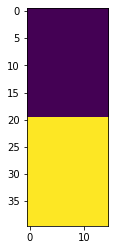

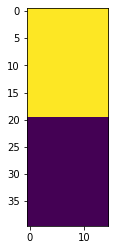

In [15]:
ysize = 20
xsize = 15

haar1 = np.concatenate( (np.zeros([ysize, xsize]), np.ones([ysize, xsize])),axis=0) - 0.5
plt.imshow(haar1)
plt.show()

ysize2 = 20
xsize2 = 25

haar2 = haar1*-1
plt.imshow(haar2)
plt.show()


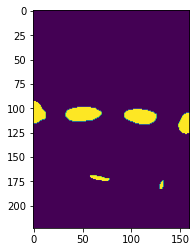

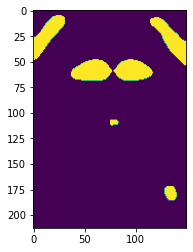

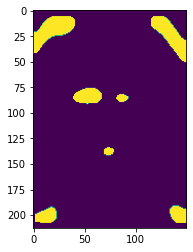

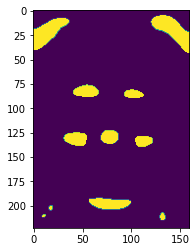

In [16]:
har_fil1 = cv2.filter2D(src=im1happy_crop, ddepth=-1, kernel=haar2)
thresh1 = (har_fil1 < np.min(har_fil1)*0.5)*1.0
plt.imshow(thresh1)
plt.show()

har_fil1 = cv2.filter2D(src=im5normal_crop, ddepth=-1, kernel=haar1)
thresh1 = (har_fil1 < np.min(har_fil1)*0.5)*1.0
plt.imshow(thresh1)
plt.show()

har_fil1 = cv2.filter2D(src=im3normal_crop, ddepth=-1, kernel=haar1)
thresh2 = (har_fil1 < np.min(har_fil1)*0.5)*1.0
plt.imshow(thresh2)
plt.show()

har_fil1 = cv2.filter2D(src=im1happy_crop, ddepth=-1, kernel=haar1)
thresh3 = (har_fil1 < np.min(har_fil1)*0.5)*1.0
plt.imshow(thresh3)
plt.show()


(101.87787628173828, 85.42959594726562)
(53.84734344482422, 82.6570816040039)


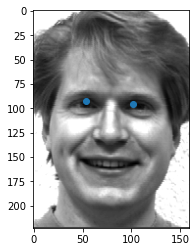

In [17]:
params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 10;    # the graylevel of images
params.maxThreshold = 200;

params.filterByColor = True
params.blobColor = 255

params.minCircularity = 0.2

# Filter by Area
params.filterByArea = True
params.minArea = 50
params.maxArea = 100000

detector = cv2.SimpleBlobDetector_create(params)

new_im = (thresh3*100).astype("uint8")
# Detect blobs.
keypoints = detector.detect(new_im)

plt.imshow(cv2.drawKeypoints(new_im, keypoints, 0, (255, 0, 0), 
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) )

# Attempt to use SIFT (didn't work L)
# sift = cv2.SIFT_create()

# im = np.array(im3normal_crop*255 ,dtype=np.uint8)

# kp = sift.detect(im, None)

# plt.imshow(cv2.drawKeypoints(im, kp, 0, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

potential_eyes = []
for kp in keypoints:
    if kp.pt[1] > new_im.shape[0]*0.5: continue
    if kp.pt[1] < new_im.shape[0]*0.25: continue
    
    print(kp.pt)
    potential_eyes.append(kp.pt)

plot_eyes = np.array(potential_eyes)
plot_eyes[:,0] = plot_eyes[:,0]
plot_eyes[:,1] = plot_eyes[:,1]+ ysize/2

plt.scatter(x = plot_eyes[:, 0], y = plot_eyes[:,1])
plt.imshow(im1happy_crop, cmap='gray')
plt.show()

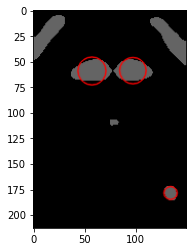

(96.81236267089844, 58.73247528076172)
(56.92903518676758, 59.078880310058594)


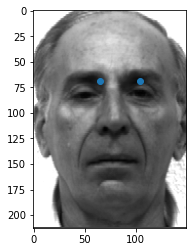

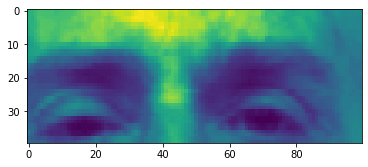

In [18]:
# img_grayscale = im3normal_crop
img_grayscale = im5normal_crop
new_im = (thresh1*100).astype("uint8")
# Detect blobs.
keypoints = detector.detect(new_im)

plt.imshow(cv2.drawKeypoints(new_im, keypoints, 0, (255, 0, 0), 
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) )
plt.show()
potential_eyes = []
for kp in keypoints:
    if kp.pt[1] > new_im.shape[0]*0.5: continue
    if kp.pt[1] < new_im.shape[0]*0.25: continue
    
    print(kp.pt)
    potential_eyes.append(kp.pt)

plot_eyes = np.array(potential_eyes)
plot_eyes[:,0] = plot_eyes[:,0]+ xsize/2
plot_eyes[:,1] = plot_eyes[:,1]+ ysize/2

plt.scatter(x = plot_eyes[:, 0], y = plot_eyes[:,1])
plt.imshow(img_grayscale, cmap='gray')
plt.show()

x_bound = 30
y_bound = 20

eye_crop = img_grayscale[int(np.mean(plot_eyes[:,1]))-y_bound : int(np.mean(plot_eyes[:,1]))+y_bound, 
                          int(np.min(plot_eyes[:,0]))-x_bound : int(np.max(plot_eyes[:,0]))+x_bound]
plt.imshow(eye_crop)
plt.show()

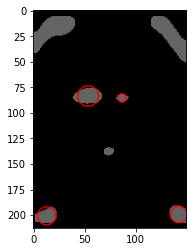

(86.42241668701172, 85.47126770019531)
(53.19123840332031, 83.51335144042969)


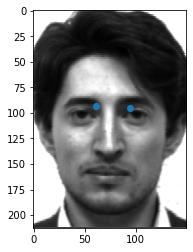

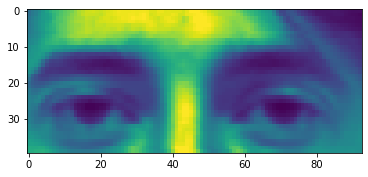

In [19]:
img_grayscale = im3normal_crop
# img_grayscale = im5normal_crop
new_im = (thresh2*100).astype("uint8")
# Detect blobs.
keypoints = detector.detect(new_im)

plt.imshow(cv2.drawKeypoints(new_im, keypoints, 0, (255, 0, 0), 
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) )
plt.show()
potential_eyes = []
for kp in keypoints:
    if kp.pt[1] > new_im.shape[0]*0.5: continue
    if kp.pt[1] < new_im.shape[0]*0.25: continue
    
    print(kp.pt)
    potential_eyes.append(kp.pt)

plot_eyes = np.array(potential_eyes)
plot_eyes[:,0] = plot_eyes[:,0]+ xsize/2
plot_eyes[:,1] = plot_eyes[:,1]+ ysize/2

plt.scatter(x = plot_eyes[:, 0], y = plot_eyes[:,1])
plt.imshow(img_grayscale, cmap='gray')
plt.show()

x_bound = 30
y_bound = 20

eye_crop = img_grayscale[int(np.mean(plot_eyes[:,1]))-y_bound : int(np.mean(plot_eyes[:,1]))+y_bound, 
                          int(np.min(plot_eyes[:,0]))-x_bound : int(np.max(plot_eyes[:,0]))+x_bound]
plt.imshow(eye_crop)
plt.show()

In [20]:
round(3.6)

4

In [21]:
round(np.mean(plot_eyes[:,1]))-y_bound

74.0

In [22]:
round(np.mean(plot_eyes[:,1]))+y_bound

114.0

## Workflow for One Image

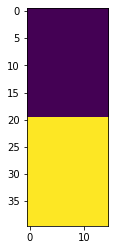

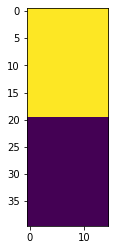

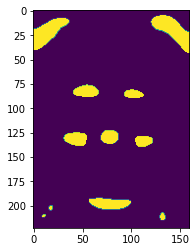

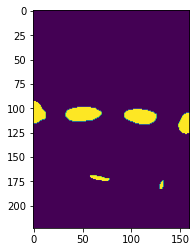

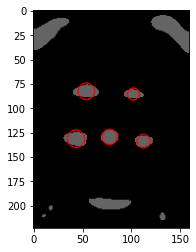

(101.87787628173828, 85.42959594726562)
(53.84734344482422, 82.6570816040039)


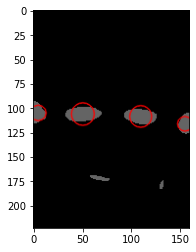

(109.23176574707031, 108.35570526123047)
(50.29560470581055, 105.9572982788086)


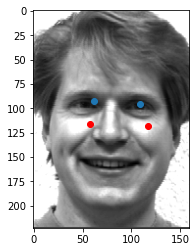

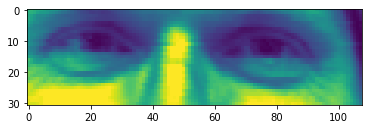

In [315]:
ysize = 20
xsize = 15


x_bound = 30
y_bound = 8

im_file = 'images/subject01_happy.png'
img_raw = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
img_grayscale = img_raw[20:, 100:260] 

# im_file = 'images/subject05_normal.png'
# img_raw = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
# img_grayscale = img_raw[30:, 110:260]

# im_file = 'images/subject03_normal.png'
# img_raw = np.float32(cv2.imread(im_file, cv2.IMREAD_GRAYSCALE) / 255.0)
# img_grayscale = img_raw[30:, 90:240]


haar1 = np.concatenate( (np.zeros([ysize, xsize]), np.ones([ysize, xsize])),axis=0) - 0.5
plt.imshow(haar1)
plt.show()

haar2 = haar1*-1
plt.imshow(haar2)
plt.show()


har_fil1 = cv2.filter2D(src=img_grayscale, ddepth=-1, kernel=haar1)
thresh1 = (har_fil1 < np.min(har_fil1)*0.5)*1.0
plt.imshow(thresh1)
plt.show()

har_fil2 = cv2.filter2D(src=img_grayscale, ddepth=-1, kernel=haar2)
thresh2 = (har_fil2 < np.min(har_fil2)*0.5)*1.0
plt.imshow(thresh2)
plt.show()

binary_img1 = (thresh1*100).astype("uint8")
binary_img2 = (thresh2*100).astype("uint8")
potential_eyes = []
potential_cheeks = []


params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 10;    # the graylevel of images
params.maxThreshold = 200;

params.filterByColor = True
params.blobColor = 255

params.minCircularity = 0.1

# Filter by Area
params.filterByArea = True
params.minArea = 50
params.maxArea = 100000

detector = cv2.SimpleBlobDetector_create(params)

#detect eyes
keypoints = detector.detect(binary_img1)

plt.imshow(cv2.drawKeypoints(binary_img1, keypoints, 0, (255, 0, 0), 
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) )
plt.show()

for kp in keypoints:
    if kp.pt[1] > new_im.shape[0]*0.5: continue
    if kp.pt[1] < new_im.shape[0]*0.25: continue
        
    
    if kp.pt[0] > new_im.shape[1]*0.8: continue
    if kp.pt[0] < new_im.shape[1]*0.2: continue
    
    print(kp.pt)
    potential_eyes.append(kp.pt)

# Detect cheeks
keypoints = detector.detect(binary_img2)

plt.imshow(cv2.drawKeypoints(binary_img2, keypoints, 0, (255, 0, 0), 
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) )
plt.show()


for kp in keypoints:
    if kp.pt[1] > new_im.shape[0]*0.7: continue
    if kp.pt[1] < new_im.shape[0]*0.4: continue
        
    
    if kp.pt[0] > new_im.shape[1]*0.8: continue
    if kp.pt[0] < new_im.shape[1]*0.2: continue
    
    print(kp.pt)
    potential_cheeks.append(kp.pt)
    
    
plot_eyes = np.array(potential_eyes)
plot_eyes[:,0] = plot_eyes[:,0]+ xsize/2
plot_eyes[:,1] = plot_eyes[:,1]+ ysize/2

plot_cheeks = np.array(potential_cheeks)
plot_cheeks[:,0] = plot_cheeks[:,0]+ xsize/2
plot_cheeks[:,1] = plot_cheeks[:,1]+ ysize/2


plt.scatter(x = plot_eyes[:, 0], y = plot_eyes[:,1])
plt.scatter(x = plot_cheeks[:, 0], y = plot_cheeks[:,1], color='red')

plt.imshow(img_grayscale, cmap='gray')
plt.show()


eye_crop = img_grayscale[int(np.mean(plot_eyes[:,1]))-y_bound: int(np.mean(plot_cheeks[:,1])),
                          int(np.min(plot_eyes[:,0]))-x_bound : int(np.max(plot_eyes[:,0]))+x_bound]
plt.imshow(eye_crop)
plt.show()

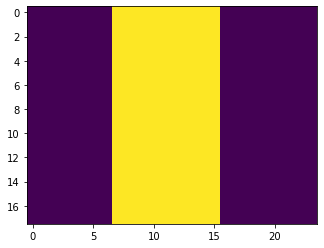

In [316]:
eye_size_x = 24
eye_size_y = 18


haar_eye = np.zeros([eye_size_y, eye_size_x])
haar_eye[:, int(eye_size_x*0.33):int(eye_size_x*0.67)] = 1
haar_eye = haar_eye - 0.5

plt.imshow(haar_eye)
plt.show()

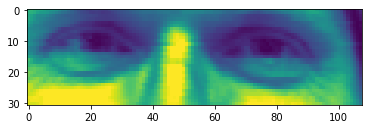

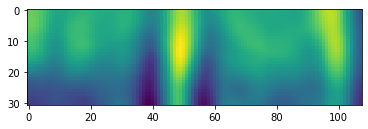

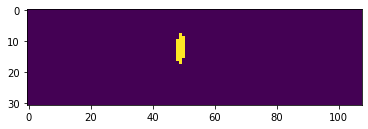

In [317]:
haar_fil_eye = cv2.filter2D(src=eye_crop, ddepth=-1, kernel=haar_eye)
haar_fil_eye = haar_fil_eye - np.mean(haar_fil_eye)
thresh_eye = (haar_fil_eye > np.max(haar_fil_eye)*0.9)*1.0

plt.imshow(eye_crop)
plt.show()

plt.imshow(haar_fil_eye)
plt.show()

plt.imshow(thresh_eye)
plt.show()

binary_img = (thresh1*100).astype("uint8")

In [318]:
idx = np.unravel_index(np.argmax(haar_fil_eye), haar_fil_eye.shape)

In [319]:
idx

(13, 49)

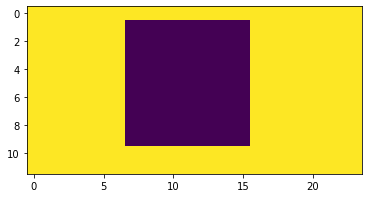

In [320]:
eye_size_x = 24
eye_size_y = 12


haar_eye = np.ones([eye_size_y, eye_size_x])
haar_eye[int(eye_size_y*0.1):int(eye_size_y*0.9), int(eye_size_x*0.33):int(eye_size_x*0.67)] = 0
haar_eye = haar_eye - 0.9

plt.imshow(haar_eye)
plt.show()

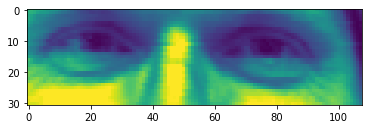

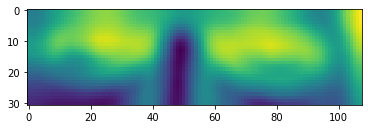

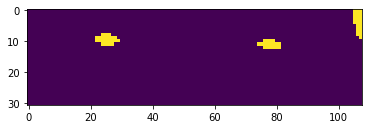

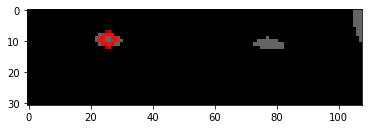

(25.649572372436523, 9.606837272644043)


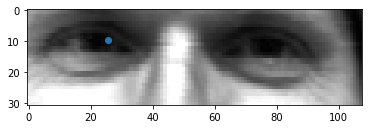

In [321]:
THRESHOLD_VAL = 0.8

haar_fil_eye = cv2.filter2D(src=eye_crop, ddepth=-1, kernel=haar_eye)
haar_fil_eye = haar_fil_eye - np.mean(haar_fil_eye)
thresh_eye = (haar_fil_eye > np.max(haar_fil_eye)*THRESHOLD_VAL)*1.0

plt.imshow(eye_crop)
plt.show()

plt.imshow(haar_fil_eye)
plt.show()

plt.imshow(thresh_eye)
plt.show()


params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 2;    # the graylevel of images
params.maxThreshold = 200;

params.filterByColor = True
params.blobColor = 255

params.minCircularity = 0

# Filter by Area
params.filterByArea = True
params.minArea = 5
params.maxArea = 100

detector = cv2.SimpleBlobDetector_create(params)

#detect eyes
binary_img = (thresh_eye*100).astype("uint8")
keypoints = detector.detect(binary_img)

while len(keypoints) == 0:
    THRESHOLD_VAL -= 0.02
    thresh_eye = (haar_fil_eye > np.max(haar_fil_eye)*THRESHOLD_VAL)*1.0
    binary_img = (thresh_eye*100).astype("uint8")
    keypoints = detector.detect(binary_img)
    if THRESHOLD_VAL == 0.7: THRESHOLD_VAL = 0.9
    if THRESHOLD_VAL == 0.8: continue


plt.imshow(cv2.drawKeypoints(binary_img, keypoints, 0, (255, 0, 0), 
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) )
plt.show()

exact_eyes = []
for kp in keypoints:
    print(kp.pt)
    exact_eyes.append(kp.pt)

    
coords_eyes = np.array(exact_eyes)

plt.scatter(x = coords_eyes[:, 0], y = coords_eyes[:,1])

plt.imshow(eye_crop, cmap='gray')
plt.show()


In [322]:
eye_coord1 = coords_eyes[0,0]
eye_coord1

25.649572372436523

In [323]:
if len(coords_eyes) < 2:
    eye_coord2 = idx[1] - (coords_eyes[0,0] - idx[1])
else:
    eye_coord2 = coords_eyes[1,0] 


eye_coord1 += int(np.min(plot_eyes[:,0]))-x_bound 
eye_coord2 += int(np.min(plot_eyes[:,0]))-x_bound 
print(eye_coord1)
print(eye_coord2)


56.64957237243652
103.35042762756348


In [324]:
eye_y_coord = coords_eyes[0,1] + int(np.mean(plot_eyes[:,1]))-y_bound               

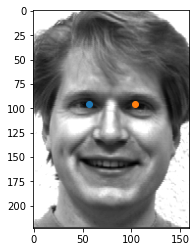

In [325]:
plt.scatter(x = eye_coord1, y = eye_y_coord)
plt.scatter(x = eye_coord2, y = eye_y_coord)

plt.imshow(img_grayscale, cmap='gray')
plt.show()